In [1]:
import tensorflow as tf
from tensorflow import keras as ks

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.utils import to_categorical

mnist = ks.datasets.mnist
(X_train, X_labels), (Y_train, Y_labels) = mnist.load_data()

X_train = X_train.reshape((60000, 28, 28, 1))
X_train = X_train.astype('float32') / 255

Y_train = Y_train.reshape((10000, 28, 28, 1))
Y_train = Y_train.astype('float32') / 255

X_labels = to_categorical(X_labels)
Y_labels = to_categorical(Y_labels)

(X_train.shape), (X_labels.shape), (Y_train.shape), (Y_labels.shape)

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

In [3]:
def mnist_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    
    model.compile(
        loss='categorical_crossentropy',
        optimizer='sgd',
        metrics=['mae', 'mse']
    )
    
    return model

In [4]:
model = mnist_model()


historyMN = model.fit(
    X_train, X_labels,
    validation_split = 0.2,
    batch_size=72,
    epochs=5,
    verbose=1
)

test_acc = model.evaluate(Y_train, Y_labels)


print('Test accuracy:', test_acc)

Epoch 1/5
667/667 [==============================] - 9s 14ms/step - loss: 1.5053 - mae: 0.1350 - mse: 0.0627 - val_loss: 0.5372 - val_mae: 0.0601 - val_mse: 0.0238
Epoch 2/5
667/667 [==============================] - 9s 13ms/step - loss: 0.4200 - mae: 0.0443 - mse: 0.0191 - val_loss: 0.3288 - val_mae: 0.0346 - val_mse: 0.0152
Epoch 3/5
667/667 [==============================] - 9s 13ms/step - loss: 0.2859 - mae: 0.0296 - mse: 0.0132 - val_loss: 0.2359 - val_mae: 0.0246 - val_mse: 0.0109
Epoch 4/5
667/667 [==============================] - 9s 14ms/step - loss: 0.2293 - mae: 0.0237 - mse: 0.0106 - val_loss: 0.2085 - val_mae: 0.0210 - val_mse: 0.0096
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1947 - mae: 0.0198 - mse: 0.0094
Test accuracy: [0.19468367099761963, 0.019803322851657867, 0.009415782056748867]


In [5]:
hist = pd.DataFrame(historyMN.history)
hist['epoch'] = historyMN.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,1.505341,0.134980,0.062743,0.537191,0.060140,0.023779,0
1,0.420011,0.044290,0.019073,0.328799,0.034633,0.015169,1
2,0.285947,0.029634,0.013210,0.235902,0.024585,0.010926,2
3,0.229300,0.023735,0.010625,0.208479,0.021028,0.009638,3
4,0.196259,0.020340,0.009106,0.205194,0.020005,0.009526,4


In [6]:
def plot_history(history):     
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mse'],'r--',
           label='Training Error')
    plt.plot(hist['epoch'], hist['val_mse'],'b',
           label = 'Validation Error')
    plt.ylim([0, 0.1])
    plt.legend()
    plt.show()

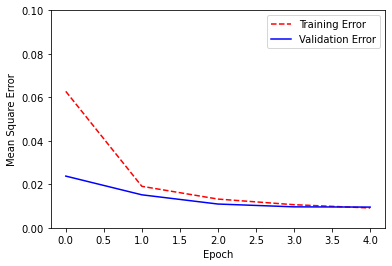

In [7]:
plot_history(historyMN)
x_imagenes = Y_train.reshape(10000, 28,28)

In [8]:
def plot_loss(history):     
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error')
    plt.plot(hist['epoch'], hist['mae'],'r--',
           label='Training Error')
    plt.plot(hist['epoch'], hist['val_mae'],'b',
           label = 'Validation Error')
    plt.plot(hist['epoch'], hist['loss'],'g',
           label = 'Error')
    plt.ylim([0, 0.3])
    plt.legend()
    plt.show()

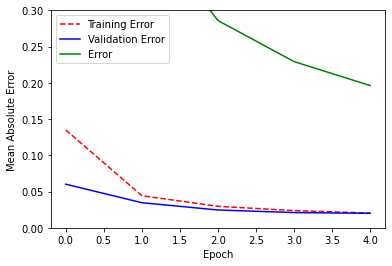

In [9]:
plot_loss(historyMN)

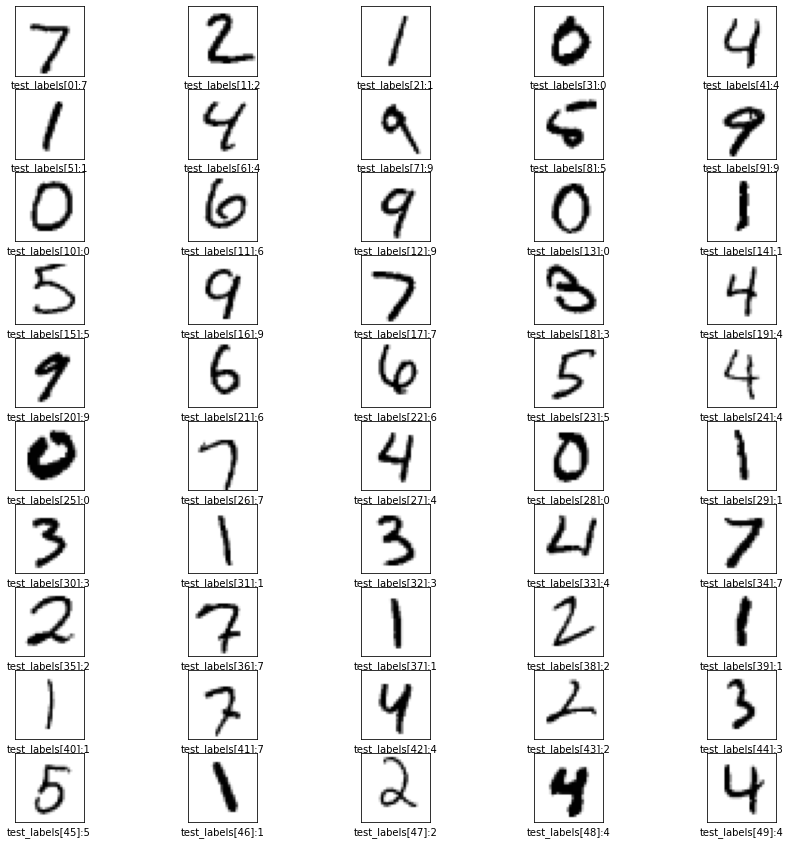

In [8]:
plt.figure(figsize=(15,15))
for i in range(50):
    plt.subplot(10,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_imagenes[i], cmap=plt.cm.binary)
    plt.xlabel('test_labels['+str(i)+']:'+str(np.argmax(Y_labels[i])))
plt.show()

Ingresese la posición de la imagen a reconocer (0-9999):  7


usted reconocerá la siguiente imagen:


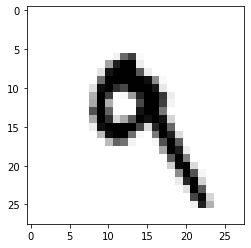

In [9]:
pos = input('Ingresese la posición de la imagen a reconocer (0-9999): ')

print('usted reconocerá la siguiente imagen:')

plt.imshow(x_imagenes[int(pos)], cmap=plt.cm.binary)

In [10]:
recog = np.array([Y_train[36]])
salida_nn = model.predict(recog)
print('El dígito reconocido es: ', np.argmax(salida_nn[0]))

El dígito reconocido es:  7


In [11]:
predictions = model.predict(Y_train)
predictions = np.argmax(predictions, axis=1)
Y_labels = np.argmax(Y_labels, axis=1)

In [12]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_labels, predictions)

In [13]:
matrix

array([[ 960,    0,    2,    0,    1,    4,    5,    5,    3,    0],
       [   0, 1118,    3,    2,    0,    0,    2,    1,    9,    0],
       [   4,    0,  982,    3,    6,    4,    4,   24,    3,    2],
       [   0,    0,   16,  954,    0,   13,    0,   16,    6,    5],
       [   2,    1,    2,    0,  936,    1,    5,    3,    4,   28],
       [   3,    0,    0,   10,    2,  866,    2,    2,    6,    1],
       [   8,    3,    3,    1,    9,   13,  917,    0,    3,    1],
       [   1,    3,   27,    9,    0,    1,    0,  982,    1,    4],
       [   1,    0,    8,    3,    6,   14,    2,   14,  914,   12],
       [   6,    3,    1,    5,   11,    8,    0,   17,   14,  944]],
      dtype=int64)

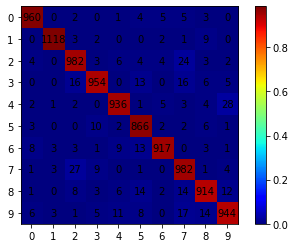

In [14]:
norm_conf = []

for arr in matrix:
    a = 0
    tmp_arr = []
    a = sum(arr, 0)
    
    for j in arr:
        tmp_arr.append(float(j) / float(a))
        
    norm_conf.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(2)
res = ax.imshow(
    np.array(norm_conf),
    cmap=plt.cm.jet, 
    interpolation='nearest'
)

width, height = matrix.shape

for x in np.arange(width):
    for y in np.arange(height):
        ax.annotate(
            str(matrix[x][y]), xy=(y, x), 
            horizontalalignment='center',
            verticalalignment='center'
        )

cb = fig.colorbar(res)
alphabet = '0123456789'
plt.xticks(range(width), alphabet[:width])
plt.yticks(range(height), alphabet[:height])
plt.savefig('confusion_matrix.png', format='png')

In [15]:
from keras_preprocessing import image
from keras_preprocessing.image import load_img, img_to_array

import cv2
import pylab as pl

<Figure size 432x288 with 0 Axes>

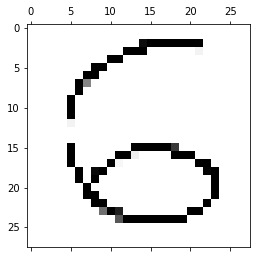

In [23]:
x_image = img_to_array(load_img('./test_six.png', target_size=(28, 28)))
#x_image = cv2.resize(x_image, (28, 28))
x_image = 255 - x_image
#print(x_image[:, :, 0])
x_image = x_image[:, :, 0]

pl.gray()

pl.matshow(x_image)

pl.show()

im_final = x_image.reshape(1, 28, 28, 1)

In [24]:
salida_nn = model.predict(im_final)
print(salida_nn)
print('El dígito reconocido es: ', np.argmax(salida_nn[0]))

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
El dígito reconocido es:  2


In [25]:
model.save('mnist_model.h5')